# Predictive Analysis on Climate Change and Impacts in Africa
## - By Michael Michael Jeremiah


![Climate change1](Climate%20change1.jpg)



## Overview
According to the [United Nations](https://www.un.org/en/climatechange/what-is-climate-change), Climate change refers to long-term shifts in temperatures and weather patterns. Such shifts can be natural, due to changes in the sun’s activity or large volcanic eruptions. But since the 1800s, **human activities** have been the main driver of climate change, primarily due to the burning of fossil fuels like coal, oil, and gas.

## Problem
The consequences of climate change now include, among others, intense droughts, water scarcity, severe fires, rising sea levels, flooding, melting polar ice, catastrophic storms, and declining biodiversity.



## Dataset

*The dataset, IEA-EDGAR CO2, is a component of the EDGAR (Emissions Database for Global Atmospheric Research) Community GHG database version 7.0 (2022) including or based on data from IEA (2021) Greenhouse Gas Emissions from Energy, www.iea.org/statistics, as modified by the Joint Research Centre. The data source was the [EDGARv7.0_GHG website](https://edgar.jrc.ec.europa.eu/dataset_ghg70) provided by Crippa *et. al.* (2022) and with [DOI](https://data.europa.eu/doi/10.2904/JRC_DATASET_EDGAR).*
 [IEA-EDGAR CO2 dataset](https://docs.google.com/spreadsheets/d/1cNhVUPKYP79AayGJp89_tXCJmHoxQO4cwiaseSziwbY/edit#gid=191680117) 
The dataset contains three sheets - `IPCC 2006`, `1PCC 1996`, and `TOTALS BY COUNTRY` on the amount of CO2 (a greenhouse gas) generated by countries between 1970 and 2021. **You can download the dataset from your workspace or inspect the dataset directly [here](https://docs.google.com/spreadsheets/d/1cNhVUPKYP79AayGJp89_tXCJmHoxQO4cwiaseSziwbY/edit#gid=191680117)**.

### TOTALS BY COUNTRY SHEET

This sheet contains the annual CO2 (kt) produced between 1970 - 2021 in each country. The relevant columns in this sheet are:

| Columns | Description |
| ------- | ------------|
| `C_group_IM24_sh` | The region of the world |
| `Country_code_A3` | The country code |
| `Name`            | The name of the country |
| `Y_1970 - Y_2021` | The amount of CO2 (kt) from 1970 - 2021 |


### IPCC 2006

These sheets contain the amount of CO2 by country and the industry responsible. 

| Columns | Description |
| ------- | ------------|
| `C_group_IM24_sh` | The region of the world |
| `Country_code_A3` | The country code |
| `Name`            | The name of the country |
| `Y_1970 - Y_2021` | The amount of CO2 (kt) from 1970 - 2021 |
| `ipcc_code_2006_for_standard_report_name` | The industry responsible for generating CO2 |

## Table of contents


1. Clean and tidy the datasets. 
2. Create a line plot to show the trend of `CO2` levels across the African regions.
3. Determine the relationship between time (`Year`) and `CO2` levels across the African regions.
4. Determine if there is a significant difference in the `CO2` levels among the African Regions.
5. Determine the most common (top 5) industries in each African region.
6. Determine the industry responsible for the most amount of CO2 (on average) in each African Region.
7. Predict the `CO2` levels (at each African region) in the year 2025.
8. Determine if `CO2` levels affect annual `temperature` in the selected African countries.


In [69]:
# Setup of all required library
# Setup
import pandas as pd
import numpy as np
import pingouin
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS
import seaborn as sns
import matplotlib.pyplot as plt
import inspect

plt.style.use('ggplot')
# The sheet names containing our datasets
sheet_names = ['IPCC 2006', 'TOTALS BY COUNTRY']

# The column names of the dataset starts from rows 11
# Let's skip the first 10 rows
datasets = pd.read_excel('IEA_EDGAR_CO2_1970-2021.xlsx', sheet_name = sheet_names, skiprows = 10)

# we need only the African regions
african_regions = ['Eastern_Africa', 'Western_Africa', 'Southern_Africa', 'Northern_Africa']

ipcc_2006_africa = datasets['IPCC 2006'].query('C_group_IM24_sh in @african_regions')

totals_by_country_africa = datasets['TOTALS BY COUNTRY'].query('C_group_IM24_sh in @african_regions')


# Read the temperatures datasets containing four African countries
# One from each African Region:
# Nigeria:    West Africa
# Ethiopa :   East Africa
# Tunisia:    North Africa
# Mozambique: South Africa
temperatures = pd.read_csv('temperatures.csv')

## Tasks 1: Clean and tidy the datasets

### 

- Rename `C_group_IM24_sh` to `Region`, `Country_code_A3` to `Code`, and `ipcc_code_2006_for_standard_report_name` to `Industry` in the corresponding African datasets.
- Drop `IPCC_annex`, `ipcc_code_2006_for_standard_report`, and `Substance` from the corresponding datasets.
- Melt `Y_1970` to `Y_2021` into a two columns `Year` and `CO2`. Drop rows where `CO2` is missing.
- Convert `Year` to `int` type.


In [70]:
# Rename columns
ipcc_2006_africa.rename(columns={'C_group_IM24_sh':'Region','Country_code_A3':'Code','ipcc_code_2006_for_standard_report_name':'Industry'}, inplace=True)

# Drop columns
ipcc_2006_africa = ipcc_2006_africa.drop(['IPCC_annex','ipcc_code_2006_for_standard_report','Substance'],axis=1)  

# Melt data
ipcc_2006_africa=pd.melt(ipcc_2006_africa, id_vars = ipcc_2006_africa.iloc[:, 0:5])

# Remane variable and values
ipcc_2006_africa.rename(columns={'variable':'Year','value':'CO2'},inplace=True)

# Split strings Y_
ipcc_2006_africa['Year']= ipcc_2006_africa['Year'].str.split('_').str[-1]

# Change Year data type to intger
ipcc_2006_africa['Year']= ipcc_2006_africa.Year.astype(int)

# Drop row with missing values
ipcc_2006_africa = ipcc_2006_africa.dropna(subset=['CO2'])

# check output
ipcc_2006_africa

,Region,Code,Name,Industry,fossil_bio,Year,CO2
0,Southern_Africa,AGO,Angola,Manufacturing Industries and Construction,bio,1970,468.101210
1,Southern_Africa,AGO,Angola,Residential and other sectors,bio,1970,9803.605447
3,Southern_Africa,AGO,Angola,Emissions from biomass burning,bio,1970,1168.997514
4,Southern_Africa,AGO,Angola,Main Activity Electricity and Heat Production,fossil,1970,137.584287
5,Southern_Africa,AGO,Angola,Petroleum Refining - Manufacture of Solid Fuel...,fossil,1970,74.805080
...,...,...,...,...,...,...,...
60209,Southern_Africa,ZWE,Zimbabwe,Cement production,fossil,2021,591.973178
60210,Southern_Africa,ZWE,Zimbabwe,Glass Production,fossil,2021,0.839446
60211,Southern_Africa,ZWE,Zimbabwe,Other Process Uses of Carbonates,fossil,2021,1.417387
60213,Southern_Africa,ZWE,Zimbabwe,Metal Industry,fossil,2021,310.070187


In [71]:
# Rename columns
totals_by_country_africa.rename(columns={'C_group_IM24_sh':'Region','Country_code_A3':'Code'}, inplace=True)

# Drop columns
totals_by_country_africa = totals_by_country_africa.drop(['IPCC_annex','Substance'],axis=1)  

# Melt dataset
totals_by_country_africa=pd.melt(totals_by_country_africa, id_vars = totals_by_country_africa.iloc[:, 0:3])

# Remane variable and values
totals_by_country_africa.rename(columns={'variable':'Year','value':'CO2'},inplace=True)

# Split strings
totals_by_country_africa['Year']= totals_by_country_africa['Year'].str.split('_').str[-1]

# Change data type
totals_by_country_africa['Year']= totals_by_country_africa.Year.astype(int)

# Drop row with missing values
totals_by_country_africa = totals_by_country_africa.dropna(subset=['CO2'])
totals_by_country_africa

,Region,Code,Name,Year,CO2
0,Southern_Africa,AGO,Angola,1970,20393.274068
1,Eastern_Africa,BDI,Burundi,1970,4385.562636
2,Western_Africa,BEN,Benin,1970,4318.786819
3,Western_Africa,BFA,Burkina Faso,1970,8158.106987
4,Southern_Africa,BWA,Botswana,1970,947.246888
...,...,...,...,...,...
2907,Southern_Africa,TZA,Tanzania_United Republic of,2021,89961.948758
2908,Eastern_Africa,UGA,Uganda,2021,90114.416852
2909,Southern_Africa,ZAF,South Africa,2021,486199.588051
2910,Southern_Africa,ZMB,Zambia,2021,36992.720366


## Tasks 2: Show the trend of `CO2` levels across the African regions

- Using `totals_by_country_africa`, create a line plot of `CO2` vs. `Year` in each `Region` to show the trend of CO2 levels by year.

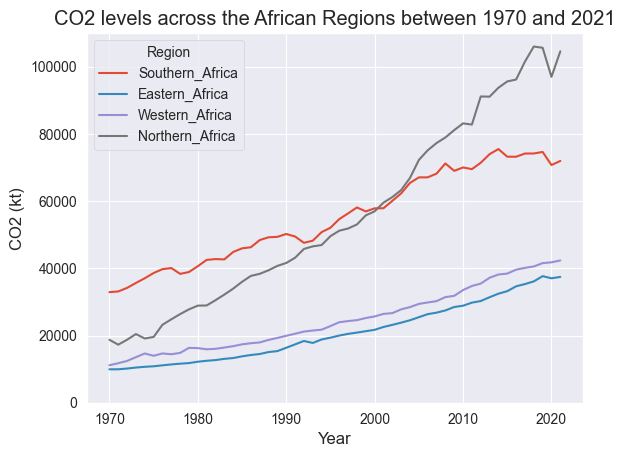

In [72]:
# line chart
sns.set_style('darkgrid')
sns.lineplot(x='Year',y='CO2', data=totals_by_country_africa, hue='Region', ci=None)
plt.ylabel('CO2 (kt)')
plt.ylim([0,110000])
plt.title('CO2 levels across the African Regions between 1970 and 2021');

## Tasks 3: Determine the relationship between time (`Year`) and `CO2` levels across the African regions

- Using the `totals_by_country_africa` dataset, conduct a Spearman's correlation to determine the relationship between time (`Year`) and `CO2` within each African `Region`.
- Save the results in a variable called `relationship_btw_time_CO2`.


In [73]:
# Group relationship_btw_time_CO2 by region 
relationship_btw_time_CO2 = totals_by_country_africa.groupby('Region').corr(method='spearman')

relationship_btw_time_CO2

Year       CO2
Region                                  
Eastern_Africa  Year  1.000000  0.181768
                CO2   0.181768  1.000000
Northern_Africa Year  1.000000  0.429875
                CO2   0.429875  1.000000
Southern_Africa Year  1.000000  0.260986
                CO2   0.260986  1.000000
Western_Africa  Year  1.000000  0.324071
                CO2   0.324071  1.000000

## Tasks 4: Determine if there is a significant difference in the CO2 levels among the African Regions

- Using `totals_by_country_africa`, to conduct an ANOVA using `pingouin.anova()` on the `CO2` by `Region`. Saved the results as `aov_results`.
- Conducted a posthoc test (with Bonferroni correction) using `pingouin.pairwise_tests()` to find the source of the significant difference. Saved the results as `pw_ttest_result`.
- Is it true that the `CO2` levels of the `Southern_Africa` and `Northern_Africa` region do not differ significantly? The previous task should provide you with the answer.

In [74]:
# Analysis of Variance (ANOVA)
aov_results = pingouin.anova(dv='CO2', data=totals_by_country_africa, between='Region')

# Pairwise t-tests with Bonferroni correction
pw_ttest_result = pingouin.pairwise_ttests(dv='CO2', data=totals_by_country_africa, between='Region', padjust="bonf").round(3)

# Results of pairwise t-tests
pw_ttest_result

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Region,Eastern_Africa,Northern_Africa,False,True,-9.436,388.384,two-sided,0.000,0.000,bonf,1.554e+17,-0.801
1,Region,Eastern_Africa,Southern_Africa,False,True,-6.815,641.442,two-sided,0.000,0.000,bonf,4.024e+08,-0.422
2,Region,Eastern_Africa,Western_Africa,False,True,-1.557,1917.149,two-sided,0.120,0.718,bonf,0.173,-0.059
3,Region,Northern_Africa,Southern_Africa,False,True,0.081,881.040,two-sided,0.936,1.000,bonf,0.079,0.005
4,Region,Northern_Africa,Western_Africa,False,True,7.589,567.965,two-sided,0.000,0.000,bonf,9.641e+10,0.418
5,Region,Southern_Africa,Western_Africa,False,True,5.721,795.804,two-sided,0.000,0.000,bonf,5.437e+05,0.335


## Tasks 5: Determine the most common (top 5) industries in each African region.

- Group the `ipcc_2006_africa` data by `Region` and `Industry`.
- Count the occurrences of each `Industry` within each `Region` and name it `Count`.
- Sort the data within each region group by `Count` in descending order
- Get the top 5 industries for each region
- save it to variable `top_5_industries` for each region.


In [75]:
# Count the occurrences of each combination of 'Region' and 'Industry'
count = ipcc_2006_africa.groupby(['Region', 'Industry']).size().reset_index(name='Count')

# Sort the counts in descending order within each region
count = count.sort_values(['Region', 'Count'], ascending=False)

# Top 5 industries with the highest counts within each region
top_5_industries = count.groupby('Region').head().reset_index(drop=True)

top_5_industries



,Region,Industry,Count
0,Western_Africa,Residential and other sectors,2541
1,Western_Africa,Manufacturing Industries and Construction,2265
2,Western_Africa,Main Activity Electricity and Heat Production,1895
3,Western_Africa,Glass Production,1300
4,Western_Africa,Road Transportation no resuspension,1297
5,Southern_Africa,Residential and other sectors,1144
6,Southern_Africa,Manufacturing Industries and Construction,1067
7,Southern_Africa,Main Activity Electricity and Heat Production,798
8,Southern_Africa,Road Transportation no resuspension,580
9,Southern_Africa,Emissions from biomass burning,572


## Tasks 6: Determine the industry responsible for the most amount of CO2 (on average) in each African Region

- Group the `ipcc_2006_africa` data by `Region` and `Industry`.
- Calculate the average `CO2` emissions for each group.
- Find the `Industry` with the maximum average `CO2` emissions in each region.

In [76]:
# Calculate the average CO2 emissions for each combination of 'Region' and 'Industry'
average = ipcc_2006_africa.groupby(['Region', 'Industry']).CO2.mean().reset_index()

# Sort the averages in descending order within each region
average = average.sort_values(['Region', 'CO2'], ascending=[True, False])

# Select the top industry with the highest average CO2 emissions within each region
top_5_industries = average.groupby('Region').head(1).reset_index(drop=True)

# Check result
top_5_industries



,Region,Industry,CO2
0,Eastern_Africa,Residential and other sectors,7904.439282
1,Northern_Africa,Main Activity Electricity and Heat Production,13612.230148
2,Southern_Africa,Main Activity Electricity and Heat Production,11377.802504
3,Western_Africa,Residential and other sectors,8702.936136


In [77]:
# Calculate average CO2 emissions for each 'Region' and 'Industry' combination
average = ipcc_2006_africa.groupby(['Region', 'Industry'])['CO2'].mean().reset_index()

# Industries with maximum average CO2 emissions within each region
max_co2_industries = average.loc[average.groupby('Region')['CO2'].idxmax()].reset_index(drop=True)

# Check results
max_co2_industries


,Region,Industry,CO2
0,Eastern_Africa,Residential and other sectors,7904.439282
1,Northern_Africa,Main Activity Electricity and Heat Production,13612.230148
2,Southern_Africa,Main Activity Electricity and Heat Production,11377.802504
3,Western_Africa,Residential and other sectors,8702.936136


## Tasks 7: Predict the `CO2` levels (at each African region) in the year 2025

- Create an instance of `LinearRegression()` and save it as `reg`.
- Fit a linear model of `CO2` (in log base 10) by `Year` and `Region` using `reg.fit()`.
- Predict the values of `CO2` using the `reg.predict()` and the data provided. Save the result as `predicted_co2`. 
- Convert `predicted_co2` values from log base 10 to decimals and round to 2 d.p using `np.round()`.


In [78]:
# Create a new DataFrame with 'Year' and 'Region' 
newdata = pd.DataFrame({'Year': 2025, 'Region': african_regions})

# Convert categorical 'Region' column into one-hot encoded columns
newdata = pd.get_dummies(newdata)

# Linear Regression model
reg = LinearRegression()

# The logarithm of CO2 emissions
lin_fit = np.log10(totals_by_country_africa['CO2'])

# Converting 'Year' and 'Region' columns into one-hot encoded columns
features = pd.get_dummies(totals_by_country_africa[['Year', 'Region']])

# Fit the Linear Regression model using features and dependent variable
reg.fit(features, lin_fit)

# Predict CO2 emissions for the new data
predicted_co2 = reg.predict(newdata)

# Transform predicted values back to original scale using 10^x
predicted_co2 = np.round(10**predicted_co2, 2)

## Instruction 8: Determine if CO2 levels affect annual temperature in the selected African countries

- Select `Name`, `Year` and `CO2` of countries `countries`. Save the result as `selected_countries`.
- Convert `temperatures` dataset from wide to long format. Set the new column names to `Name` and `Temperature`. Save the result as `temp_long`.
- Perform an inner join between `selected_countries` and `temp_long` on `Name` and `Year`. Save the result as `joined`.
- Create a linear model of `Temperature` by `CO2` and `Name`. Save the result as `model_temp`. *The code has been added for you.*
- A one unit rise in log10 `CO2` leads to how many degrees rise in temperature? Run `model_temp.summary()` to find out!
- What is the adjusted R squared value of the model?

In [79]:

# List of African countries
countries = ["Ethiopia", "Mozambique", "Nigeria", "Tunisia"]

# Select rows from totals_by_country_africa DataFrame
selected_countries = totals_by_country_africa[['Name', 'Year', 'CO2']][totals_by_country_africa['Name'].isin(countries)]

# Reshape temperature data from wide to long format
temp_long = temperatures.melt(id_vars=['Year'], value_vars=countries, var_name='Name', value_name='Temperature')

# Merge selected CO2 emissions and temperature data based on Name and Year
joined = pd.merge(selected_countries, temp_long, on=['Name', 'Year'], how='inner')

# Least Squares (OLS) regression for Temperature prediction
model_temp = OLS.from_formula("Temperature ~ np.log10(CO2) + Name", data=joined).fit()

# Show summary
model_temp.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     3241.
Date:                Mon, 25 Sep 2023   Prob (F-statistic):          1.22e-182
Time:                        21:44:07   Log-Likelihood:                -54.347
No. Observations:                 208   AIC:                             118.7
Df Residuals:                     203   BIC:                             135.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             13.4981      0.583     23.138      0.000      12.348      14.648
Name[T.Mozambique]     2.0759      0.090     23.021      0.000       1.898       2.254
Name[T.Nigeria]        2.8345      0.092     30.884      0.000       2.654       3.016
Name[T.Tunisia]       -1.6254      0.104    -15.673      0.000      -1.830      -1.421
np.log10(CO2)          1.9472      0.117     16.620      0.000       1.716       2.178
==============================================================================
Omnibus:                        3.230   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                2.985
Skew:                          -0.291   Prob(JB):                        0.225
Kurtosis:                       3.073   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""